In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np


pplib.imports()
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [3]:
ds.printMatching({'post_process':'theory_bias', 'color':'resolved', 'denominator':'ptl'})

In [5]:
from figrid.data_container import DataContainer
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'space':'real', 'mas':'CICW', 'path':'fiducial', 'simname':'tng100'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': 'resolved',
      'space':'real', 'fieldname':'galaxy',
     'path':'fiducial', 'simname':'tng100'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    ptlip['snapshot'] = s
    galip['snapshot'] = s
    
    ptls = ds.getMatching(ptlip)
    gals = ds.getMatching(galip)
    if len(ptls) > 1:
        ds.printMatching(ptlip)
    
    if len(gals) > 1:
        ds.printMatching(galip)
        
    xdata = ptls[0].getData()[0]
    ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
    ydata = np.sqrt(ydata)
    dc = DataContainer([xdata, ydata])
    dc.update(ptlip)
    dc.update(galip)
    dc.update({'censat':'both'})
    dc.add('post_process', 'obs_bias')
    dc.add('is_auto', False)
    dc.add('denominator', 'ptl')
    dc.add('numerator', 'galaxy')
    resolved_biases.append(dc)


ds.extend(resolved_biases)
    

In [9]:
ds.printMatching({'post_process':'obs_bias', 'color':'blue', 'denominator':'ptl'})

{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 53.64549684524536, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': False, 'is_atomic': False, 'is_molecular': False, 'is_particle': 'False_True', 'is_groupcat': 'True_False', 'is_matter': True, 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'ptl_species': 'dm', 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'post_process': 'obs_bias', 'numerator': 'galaxy', 'denominator': 'ptl'}

{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 53.85676026344299, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'galaxy_ptl', 'is_hydrogen': 

# Investigate

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


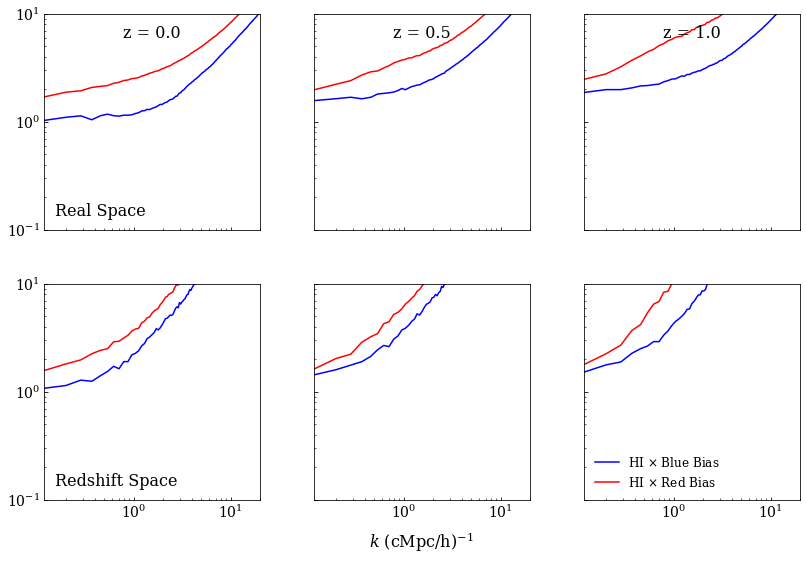

In [10]:
ip = {'is_auto':False, 'ptl_species':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'mas':'CICW', 'color': ['red', 'blue'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.1, 10))
fg.legendArgs(loc = 'lower left', fontsize = 12)
fg.plot()

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


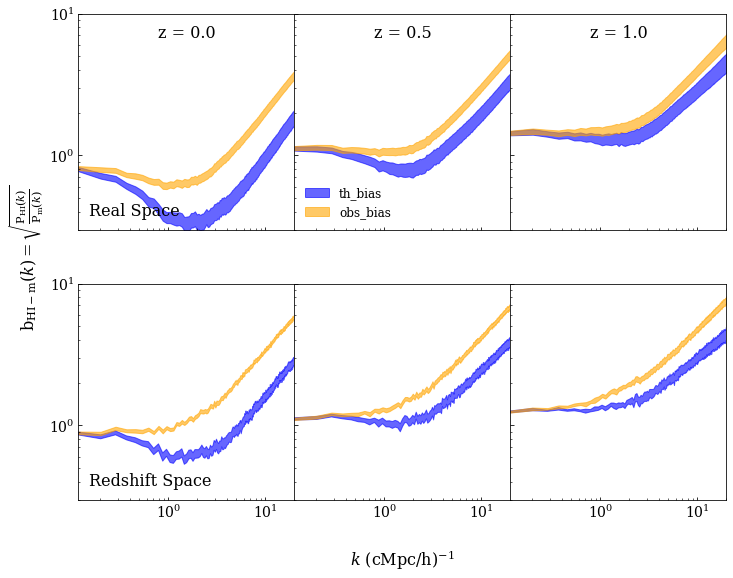

In [17]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("post_process", 'space', 'snapshot', ip)
fg.plotArgs({'post_process':'obs_bias'}, color = 'orange', label = 'obs_bias')
fg.plotArgs({'post_process':'theory_bias'}, color = 'blue', label = 'th_bias')
fg.autoFill(alpha = 0.6)
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

The row values for space: ['real', 'redshift']
The column values for simname: ['tng100', 'tng100-2', 'tng100-3']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


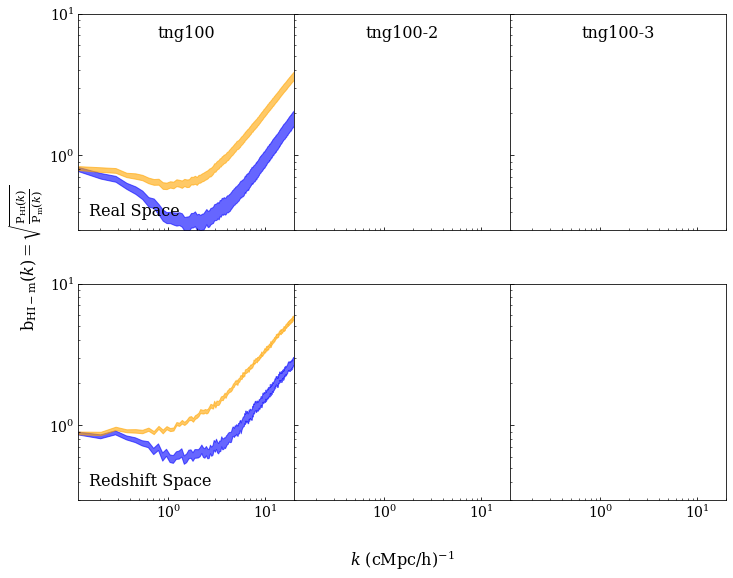

In [20]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': ['tng100', 'tng100-2', 'tng100-3'], 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99], 'space':['real', 'redshift'], 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("post_process", 'space', 'simname', ip)
fg.plotArgs({'post_process':'obs_bias'}, color = 'orange', label = 'obs_bias')
fg.plotArgs({'post_process':'theory_bias'}, color = 'blue', label = 'th_bias')
fg.autoFill(alpha = 0.6)
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50]
blue
0.28597202486091156
0.9959235833005615 0.9502356140793587
red
0.28597202486091156
0.9487375742681352 0.7516134954237709
resolved
0.28597202486091156
0.9918882479768671 0.9333786908976797
blue
0.28597202486091156
0.9937091917414794 0.9405443181484918
blue
0.28597202486091156
0.9939915606180991 0.9418773213846634
blue
0.28597202486091156
0.9937827142534056 0.9404327480061423
blue
0.28597202486091156
0.9942230454969186 0.9427183314083043
red
0.28597202486091156
0.9447061263248295 0.7373350381186551
red
0.28597202486091156
0.9452837710305172 0.7390755836048819
red
0.28597202486091156
0.94486560860589 0.7408908504334104
red
0.28597202486091156
0.9453950519852934 0.7484468797410536
resolved
0.28597202486091156
0.9891341034742056 0.9215964725587641
resolved
0.28597202486091156
0.9895034493873922 0.9231406281436956
resolved
0.28597202486091156
0.9892328643293334 0.9227338342792643
resolved
0.285972

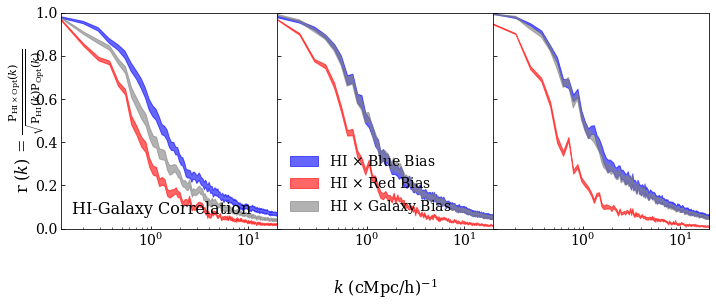

In [12]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'redshift', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Opt"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()
for i in ccfg.panels[0,2]:
    if 'figrid_process' not in i.attrs:
        print(i.attrs['color'])
        idx = np.argmin(np.abs(i.data[0] - 0.31))
        print(i.data[0][idx])
        print(i.data[1][0], i.data[1][idx])

# Website Figures

The row values for post_process: ['obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 50]


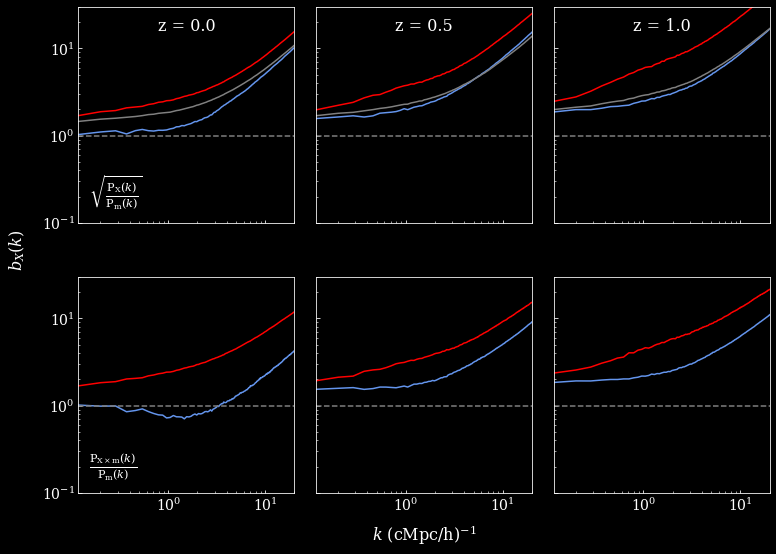

In [13]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


bfg.rowLabels([obsbias, thbias])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.plotArgs({'color':'blue'}, color = 'cornflowerblue')
bfg.setYLabel("$b_X (k)$")
bfg.setXLabel(pplib.wnum())
bfg.plotOnes()
pplib.darkmode(bfg)

bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for post_process: ['obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 50]


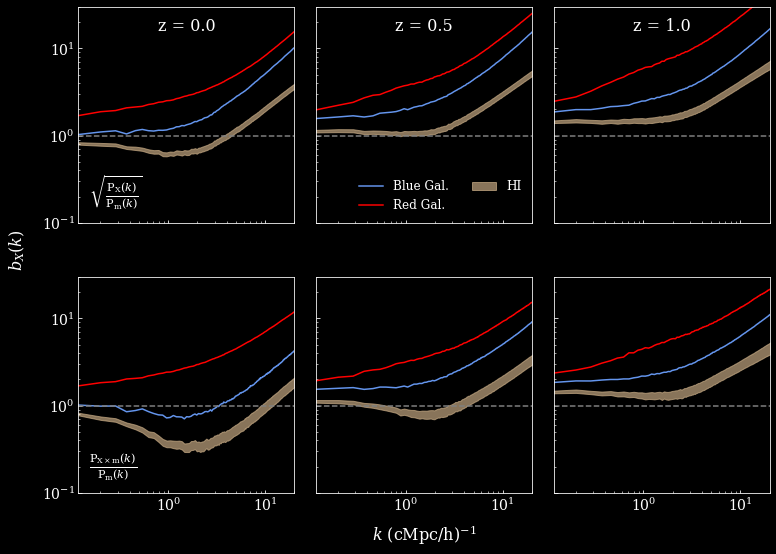

<Figure size 810x540 with 0 Axes>

In [54]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias','theory_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("", 'post_process', 'snapshot', ip)
hifg.rowLabels(["", ""])
hifg.colLabels([""]*4)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'tan')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2, labelcolor = 'white')
hifg.plot(axes = bfg.axes)
bfg.save(WEBPATH + 'images/alt_bias.png', dpi = 150)
bfg.fig

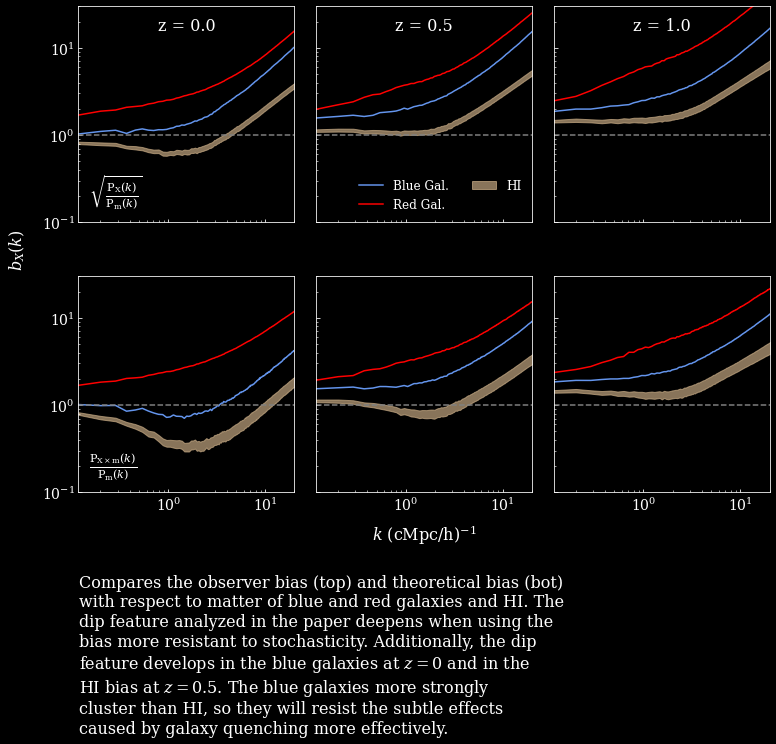

In [55]:
f = open(WEBPATH + 'captions/alt_bias.txt', 'r')
txt = f.read()
bfg.fig.text(1/bfg.fig.get_size_inches()[0], -0.05, txt, color = 'white', fontsize = 16, ha = 'left', va = 'top')
bfg.save(WEBPATH + 'images/alt_bias_caption.png', dpi = 150)
bfg.fig

# Paper Figures

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


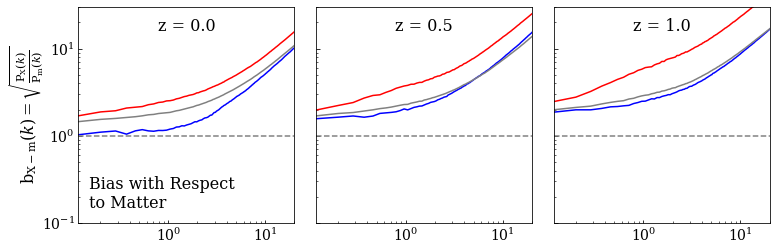

In [6]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


bfg.rowLabels(['Bias with Respect\nto Matter'])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.setYLabel(pplib.obsbiaslab('X', 'm'))
bfg.setXLabel('')
bfg.plotOnes()

bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


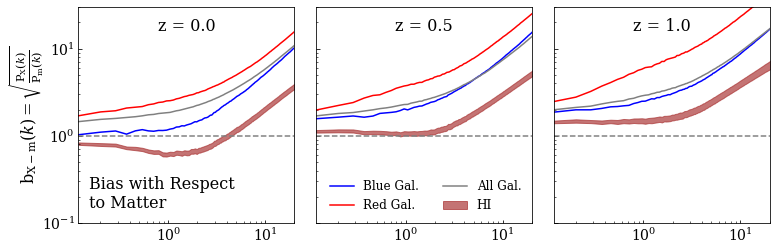

<Figure size 810x270 with 0 Axes>

In [7]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("", 'post_process', 'snapshot', ip)
hifg.rowLabels(["", ""])
hifg.colLabels([""]*4)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot(axes = bfg.axes)
bfg.fig

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50]
blue
0.9833556405886344
red
0.878252608501504
resolved
0.980518108326587
blue
0.9743980123858063
blue
0.9754247560246212
blue
0.9727633918803021
blue
0.9735561992323173
red
0.8720260401811267
red
0.8731343082730345
red
0.8743320347104477
red
0.8770886367576217
resolved
0.9721708750648349
resolved
0.973257691617257
resolved
0.9717821103700228
resolved
0.9732477700515114


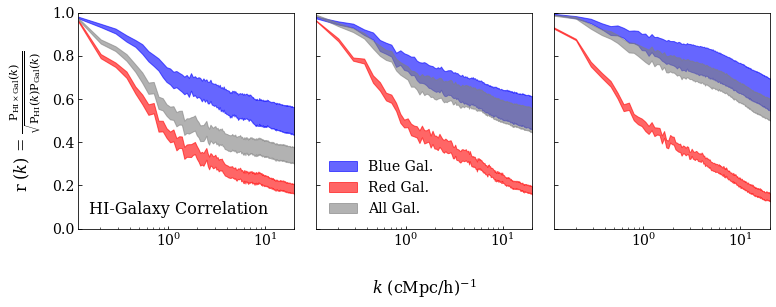

In [15]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'real', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()
for i in ccfg.panels[0,2]:
    if 'figrid_process' not in i.attrs:
        print(i.attrs['color'])
        print(i.data[1][1])


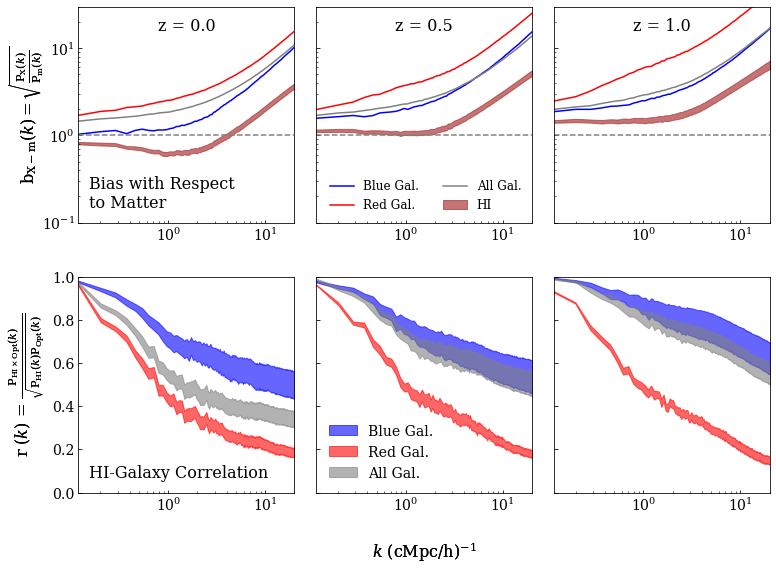

In [42]:
figarr = np.empty((2,1), dtype = object)
figarr[0,0] = bfg
figarr[1,0] = ccfg

fig = bfg.combine(figarr)
hifg.plot(axes = bfg.axes)
fig.savefig("color_post_processR_snapshotC.png", bbox_inches = 'tight')
fig.savefig("/Users/cosinga/code/hicolor_draft_two/figures/color_post_processR_snapshotC.pdf", dpi = 150, bbox_inches = 'tight')



The row values for post_process: ['obs_bias']
The column values for snapshot: [99]
[0.6240601503759399, 0]
[0, 0.5454545454545454]
The row values for : ['no key found']
The column values for snapshot: [99]
[0.6, 0]
[0, 0.6]


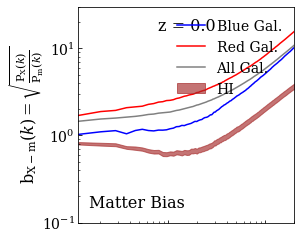

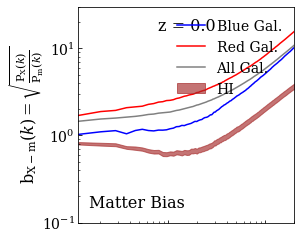

<Figure size 270x270 with 0 Axes>

## Presentation Figures

The row values for : ['no key found']
The column values for snapshot: [50]
[0.6240601503759399, 0]
[0, 0.6240601503759399]


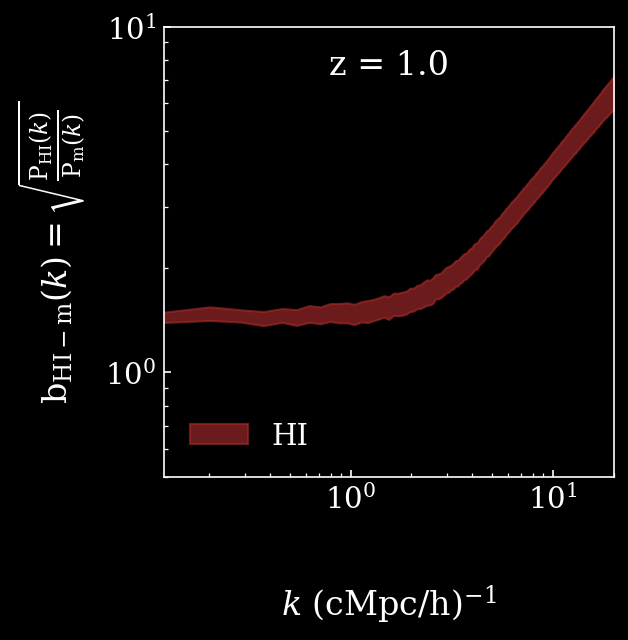

In [21]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("post_processing", '', 'snapshot', ip)
pplib.darkmode(hifg)

hifg.rowLabels([""])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.colLabels(["z = 1.0"])
hifg.legendArgs(loc = 'lower left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for : ['no key found']
The column values for : ['no key found']
[0.6240601503759399, 0]
[0, 0.6240601503759399]


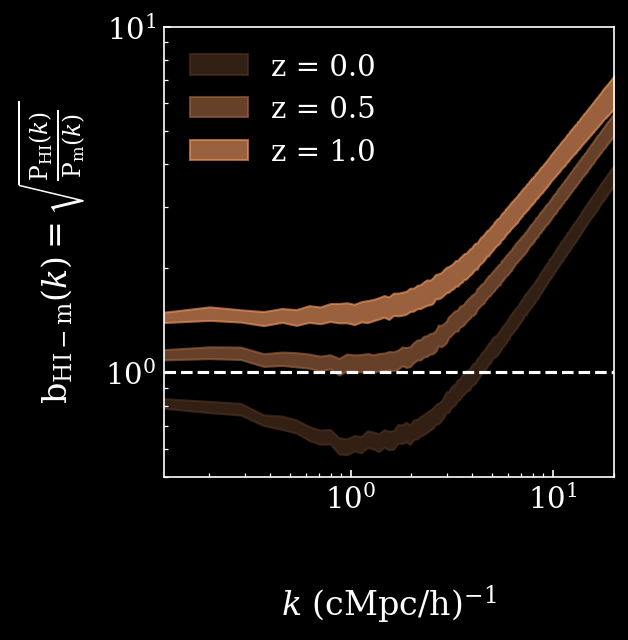

In [26]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50, 67, 99], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("snapshot", '', '', ip)
pplib.darkmode(hifg)
ip['snapshot'].reverse()
hifg.rowLabels([""])
hifg.setCmap('copper', ip['snapshot'])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.legendArgs(loc = 'upper left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
hifg.plotOnes(color = 'white')
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]
[0.5495495495495496, 0]
[0, 0.6]


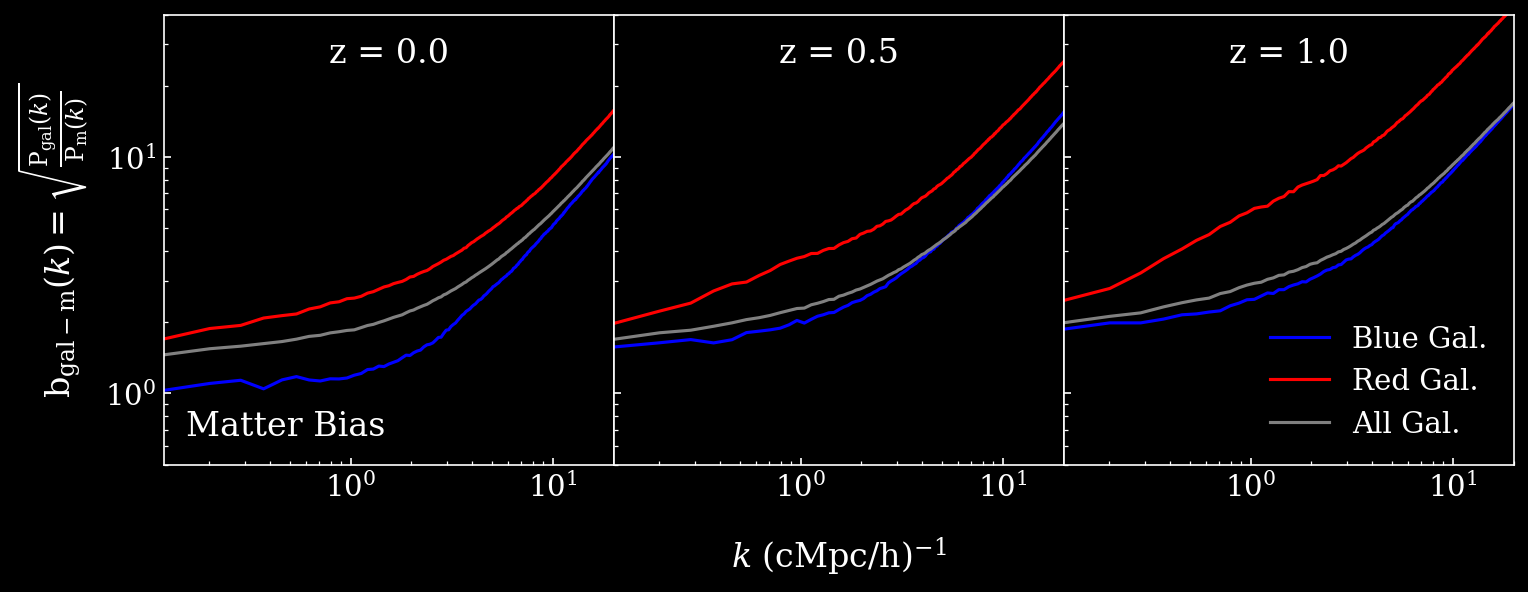

In [31]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)

bfg.rowLabels(["Matter Bias"])
bfg.gspecArgs(yborder = [0, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.5, 40))
bfg.legendArgs(loc = 'lower right')
bfg.setYLabel(pplib.obsbiaslab("gal", "m"))
pplib.darkmode(bfg)
bfg.plot()

The row values for : ['no key found']
The column values for color: ['red', 'blue', 'resolved']


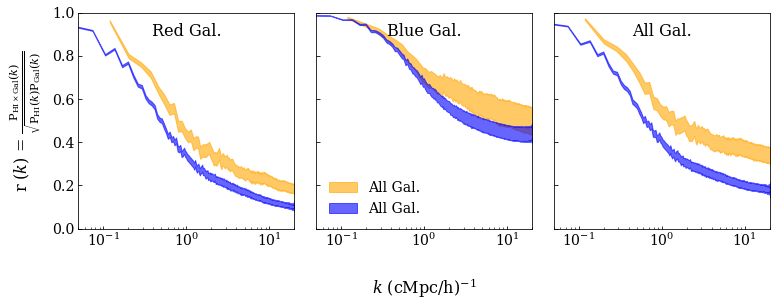

In [61]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'real', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99], 'simname':['tng300', 'tng100'],
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("simname", "", 'color', ip)
ccfg.plotArgs({"simname":'tng100'}, color = 'orange')
ccfg.plotArgs({'simname':'tng300'}, color = 'blue')
ccfg.plotArgs({'simname':'tng100-2'}, color = 'red')
ccfg.autoFill(alpha = 0.6)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
# ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1), xlim = (.05, 20))
ccfg.plot()